In [4]:
# load the data
import pandas as pd
import numpy as np

data_train = pd.read_csv("temperature_rate_train.csv")
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


In [5]:
# define X_train and y_train
X_train = data_train.loc[:, "T"]
y_train = data_train.loc[:, "rate"]

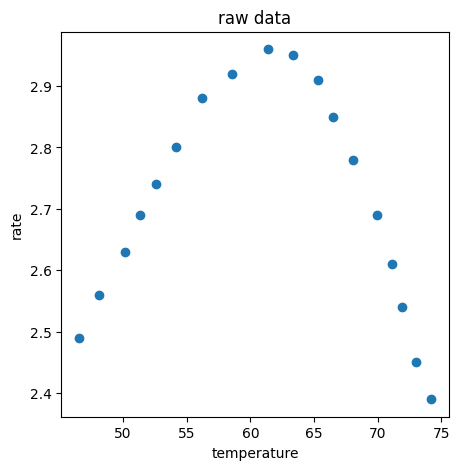

In [6]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [7]:
X_train = np.array(X_train).reshape(-1, 1)

In [8]:
# linear regression model prediction
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [9]:
# load the test data
data_test = pd.read_csv("temperature_rate_test.csv")
X_test = data_test.loc[:, "T"]
y_test = data_test.loc[:, "rate"]

In [10]:
X_test = np.array(X_test).reshape(-1, 1)

In [11]:
# make prediction on the training and testing data
from sklearn.metrics import r2_score

y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print("training r2:", r2_train)
print("test r2:", r2_test)

training r2: 0.016665703886981964
test r2: -0.758336343735132


In [12]:
# generate new data
X_range = np.linspace(40, 90, 300).reshape(-1, 1)
y_range_predict = lr1.predict(X_range)

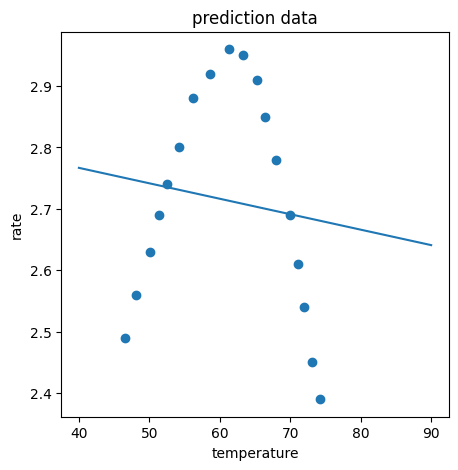

In [15]:
fig2 = plt.figure(figsize=(5, 5))
plt.plot(X_range, y_range_predict)
plt.scatter(X_train, y_train)

plt.title("prediction data")
plt.xlabel("temperature")
plt.ylabel("rate")
plt.show()

In [16]:
# 多项式模型
# generate new features
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
print(X_2_train.shape)

poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)
print(X_5_train.shape)

(18, 3)
(18, 6)


In [17]:
lr2 = LinearRegression()
lr2.fit(X_2_train, y_train)


y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train, y_2_train_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)

lr5 = LinearRegression()
lr5.fit(X_5_train, y_train)


y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train, y_5_train_predict)
r2_5_test = r2_score(y_test, y_5_test_predict)


print("training r2_2:", r2_2_train)
print("test r2_2:", r2_2_test)
print("training r2_5:", r2_5_train)
print("test r2_5:", r2_5_test)

training r2_2: 0.970051540068942
test r2_2: 0.9963954556468684
training r2_5: 0.9978527267187658
test r2_5: 0.5437837627379174


In [18]:
X_2_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

X_5_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)

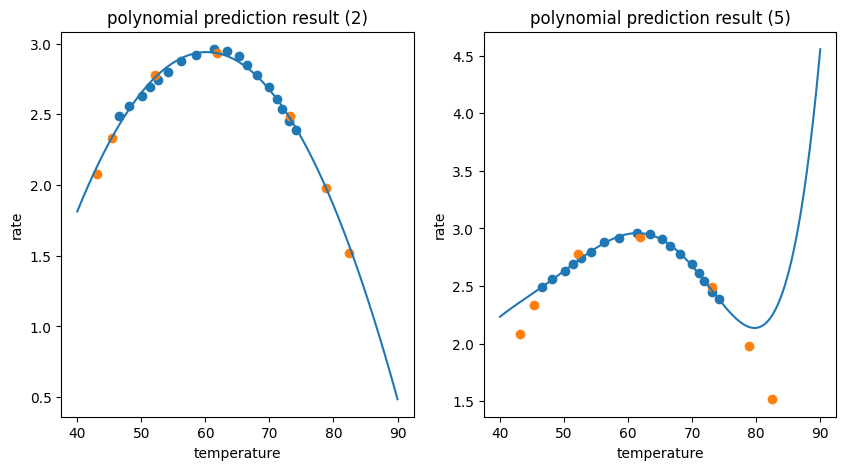

In [26]:
fig3 = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(X_range, y_2_range_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.title("polynomial prediction result (2)")
plt.xlabel("temperature")
plt.ylabel("rate")

plt.subplot(1, 2, 2)
plt.plot(X_range, y_5_range_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

plt.title("polynomial prediction result (5)")
plt.xlabel("temperature")
plt.ylabel("rate")

plt.show()